# Group Project Report Group 50 - Predicting Chest Pain #

### Introduction ###

Coronary artery disease, also commonly known as coronary heart disease, is the most common heart condition across the globe. It is caused by a buildup of plaque within the walls of the coronary arteries, those that supply blood to the heart, and for many, result in chest pain, lightheadedness, or heart attacks. Mostly consisting of cholesterol deposits, this plaque buildup may cause the arteries to narrow over time, obstructing or completely terminating bloodflow (Cleveland Clinic, 2022). The most common symptom of coronary artery disease is known as a “stable angina,” or “typical angina,” a predictable chest pain that comes and goes and must meet three criteria to be classified as so: It must be substernal (below the sternum), (Sauleda, 2020), provoked by physical activity or emotional distress, and relieved by rest or nitroglycerine. An atypical angina, however, does not meet all of the criteria points above, and may radiate to parts of the body other than the sternum (Sauleda, 2020). Non-anginal heart pain is chest pain that occurs in a patient who does not have heart disease, and non-symptomatic chest pain refers to those with coronary heart disease, but experience little to no symptoms (Fass, Achem, 2011). Although seemingly advantageous, those with no symptoms are more prone to “silent” heart attacks, those that come with no prior symptom or warning (Fass, Achem, 2011). As a result, in our proposal, we will determine whether the type of chest pain, experienced by Anginal induced patients, is affected by varying qualitative variables that are analyzed through statistical means. We will be using the 1990 processed Cleveland dataset that will include 14 attributes of a patient's health status: age, sex, chest pain type (cp), resting blood pressure (trestbps), cholesterol (chol), fasting blood sugar (fbs), resting electrocardiographic results (restecg), exercise induced angina (exang), depression induced by exercise (oldpeak), number of major vessels (ca), maximum heart rate (thalach) and dianogsis of heart disease.

### Methods & Results: ### 

We will be using K-NN Classification to determine types of chest pain (categorical variable) using select columns of our dataset as predictors. 

**Wrangling:** Column names of variables will be added to each column from the original dataframe. Furthermore, as the original dataframe consists of integer values that map to categorical values, we set chest pain (cp) as a factor and change its quantitative type to match the qualitative value. The tidy dataframe will ultimately consist of potential predictors (all numeric variables), target variable, and sex column for furhter analysis. For reference, chest pain and sex is mapped to the following:

1 -> typical angina <br/>
2 -> atypical angina <br/>
3 -> non-anginal pain <br/>
4 -> asymptomatic <br/>

0 -> female <br/>
1 -> male <br/>

**Picking predictors:** Get the average of each numeric column per chest pain type and plot a ggpair graph to see how different the variables are depending on the chest pain type. This is so that we know which variable is effective or not in differentiating chest pain types.

**Train/test split:** Find the amount of data we have per chest pain type so we can choose a good split ratio where training and testing data set has enough data for all chest pain types.

**Cross validation:** Tune the classifier to find the best K parameter using cross-validation on the training set. To achieve more concrete accuracy, cross-validation will be implemented to help find the best value of K by graphing the classifier's accuracy per K value.

**K-Nearest Neighbor Classification:** Using the best K parameter, re-train the model and use the testing set to find the model's validation accuracy.

### Setting up things we need before working on the project ###

Used `library()` to load packages that we need for this project and `options(repr.matrix.max.rows = 6)` so we can limit the output of the data by 6 rows.

In [2]:
library(tidyverse)
library(repr)
library(tidymodels)
library(GGally)
library(knitr)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

### Reading & Wrangling the Data ###

Since the raw data didn't have column names, we set `col_names = FALSE` so the first row of the data doesn't become its column name, and manually renamed all the colums by using `rename()`.

In [3]:
cleveland <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data", col_names = FALSE) |>
    rename(
        age = X1, 
        sex = X2, 
        cp = X3,
        trestbps = X4, 
        chol = X5,
        fbs = X6, 
        restecg = X7,
        thalach = X8,
        exang = X9, 
        oldpeak = X10, 
        slope = X11, 
        ca = X12, 
        thal = X13, 
        num = X14
    )
cleveland

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


**<div>Table 1.0: Unprocessed Cleveland dataframe</div>**

When looking at Table 1.0, certain columns have the wrong data type such as sex being a dbl instead of factor. Therefore, we used `as_factor()` to convert certain columns into factor variables, and used `as.numeric()` to convert certain columns into numeric variables. Moreover, some values such as "?" in the ca column will return NA when converting it to a numeric variable, so we used `na.omit()` to get rid of the rows that contain NA.

Though converting the data type of certain columns to be a factor might seem unnecessary since they are neither the variable we want to classify nor predictors we want to use, the conversion was still done for correct representation of the data.

As we are predicting types of chest pain (cp), we convert the values of cp to its corresponding chest pain name. In addition, the sex variable will be used later for data analysis, so we will also change the values. 

As it is difficult to map numerical values to their corresponding name (e.g. "1" to "typical angina"), we first convert those values to columns using `pivot_wider()`. We then rename those columns to its actual name using `rename()`.

Now that we renamed the values of all the cells from cp and sex, we use `pivot_longer()` to revert the data back to normal.

In [4]:
processed_cleveland <- cleveland |>
                        mutate(cp = as_factor(cp),
                               sex = as_factor(sex),
                               fbs = as_factor(fbs),
                               restecg = as_factor(restecg),
                               exang = as_factor(exang),
                               slope = as_factor(slope),
                               thal = as_factor(thal),
                               num = as_factor(num),
                               ca = as_factor(ca)) |>
                        na.omit()

cleveland_rows <- nrow(processed_cleveland)

cleveland_cp_wide <- processed_cleveland |>

                        # Set exang as values_from because we need to use values_from argument and we figured exang will be the simpliest values to take from
                        pivot_wider(names_from = cp, values_from = exang) |>

                        # Renaming the columns to its humanly readable names
                        rename("typical angina" = "1", "atypical angina" = "2", "non-anginal pain" = "3", "asymptomatic" = "4")

cleveland_sex_cp_wide <- cleveland_cp_wide |>

                            # Set fbs as values_from because we need to use values_from argument and we figured fbs will be the simpliest values to take from
                            pivot_wider(names_from = sex, values_from = fbs) |>
                            rename("male" = "1", "female" = "0")

cleveland_revert <- cleveland_sex_cp_wide |>
                    pivot_longer(cols = "typical angina":"atypical angina", names_to = "cp", values_to = "exang") |>
                    pivot_longer(cols = "male":"female", names_to = "sex", values_to = "fbs") |>

                    # Used drop_na() to remove all the NA cells that generated due to pivot_wider()
                    drop_na() |>
                        
                    # Converting cp and sex as factor again because all the values of cp become chr since they got converted to column
                    mutate(cp = as_factor(cp)) |>
                    mutate(sex = as_factor(sex))

# Renaming the data to something nicer
cleveland_data <- cleveland_revert

cleveland_data

age,trestbps,chol,restecg,thalach,oldpeak,slope,ca,thal,num,cp,exang,sex,fbs
<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
63,145,233,2,150,2.3,3,0.0,6.0,0,typical angina,0,male,1
67,160,286,2,108,1.5,2,3.0,3.0,2,asymptomatic,1,male,0
67,120,229,2,129,2.6,2,2.0,7.0,1,asymptomatic,1,male,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,130,131,0,115,1.2,2,1.0,7.0,3,asymptomatic,1,male,0
57,130,236,2,174,0.0,2,1.0,3.0,1,atypical angina,0,female,0
38,138,175,0,173,0.0,1,?,3.0,0,non-anginal pain,0,male,0


**<div>Table 1.1: Wrangled Cleveland dataframe </div>**

### Data Summary and Analysis ###

Let's see if the data is ready for classification by looking at Table 1.1. Firstly, we can see that the data is tidy because each row is about a patient, each column is a variable, and each cell is a value. Now, let's see if the data has any NA/missing values. To do this, we will use `colSums()` and put `is.na()` as its argument to count how many cells return `true` when going through `is.na()` per column. If we have 0 missing values, then it will return 0.

In [5]:
count_na <- colSums(is.na(cleveland_data))

count_na

age trestbps     chol  restecg  thalach  oldpeak    slope       ca 
       0        0        0        0        0        0        0        0 
    thal      num       cp    exang      sex      fbs 
       0        0        0        0        0        0

Since all values are 0, there are no NA/missing values. However, we need to filter the data so we only have useful columns for predicting. Since we can only use numerical variables as predictors in K-NN Classification, we select the numerical columns using `select()`. We then use `bind_cols()` to create a dataframe consisting of the selected numerical columns, sex and cp. We will also split the data based on sex using `filter()`. There are three resulting dataframes - `cleveland_analyze`, `cleveland_analyze_m`, and `cleveland_analyze_f`.

In [6]:
cleveland_analyze <- cleveland_data |>
                        select_if(is.numeric) |>
                        bind_cols(select(cleveland_data, sex, cp))

cleveland_analyze_m <- cleveland_analyze |>
                        filter(sex == "male")

cleveland_analyze_f <- cleveland_analyze |>
                        filter(sex == "female")

cleveland_analyze_m

age,trestbps,chol,thalach,oldpeak,sex,cp
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
63,145,233,150,2.3,male,typical angina
67,160,286,108,1.5,male,asymptomatic
67,120,229,129,2.6,male,asymptomatic
⋮,⋮,⋮,⋮,⋮,⋮,⋮
68,144,193,141,3.4,male,asymptomatic
57,130,131,115,1.2,male,asymptomatic
38,138,175,173,0.0,male,non-anginal pain


**<div>Table 1.2: Wrangled Cleveland dataframe filtered by Male </div>**

In [7]:
cleveland_analyze_f

age,trestbps,chol,thalach,oldpeak,sex,cp
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
41,130,204,172,1.4,female,atypical angina
62,140,268,160,3.6,female,asymptomatic
57,120,354,163,0.6,female,asymptomatic
⋮,⋮,⋮,⋮,⋮,⋮,⋮
63,124,197,136,0.0,female,asymptomatic
57,140,241,123,0.2,female,asymptomatic
57,130,236,174,0.0,female,atypical angina


**<div>Table 1.3: Wrangled Cleveland dataframe filtered by Female</div>**

Comparing the 206 rows in Table 1.2 to the 97 rows in Table 1.3, it seems there are more male patients than female patients. This is an indicator that we may not be able to separate the data by sex for classification since female data is lacking. To further probe this, lets determine if the quantity of chest pain types across both male and female dataframes is sufficient for having separate classifiers based on sex.

We will achieve this by examining the quantity and proportion of each chest pain type in the datasets by using `prop = n`. We first use `group_by()` to group the data based on cp, then use `summarize()` to count the quantity of cp. We will use `mutate()` to add a column for the proportion of cp. 

In [8]:
n_cp_male <- cleveland_analyze_m |>
                group_by(cp) |>

                # n = n() allows us to count the group size of each cp
                summarize(n = n()) |>

                # Dividing the group size by 206 to calculate percentage of each cp type because the total count for cp is 206
                mutate(percentage = (n/206*100))

n_cp_female <- cleveland_analyze_f |>
                group_by(cp) |>

                # n = n() allows us to count the group size of each cp
                summarize(n = n()) |>

                # Dividing the group size by 97 to calculate percentage of each cp type because the total count for cp is 97
                mutate(percentage = (n/97*100))

n_cp <- cleveland_analyze |>
            group_by(cp) |>

            # n = n() allows us to count the group size of each cp
            summarize(n = n()) |>

            # Dividing the group size by the number of total rows (303) to calculate percentage of each cp type because the total count for cp is 303
            mutate(percentage = (n/cleveland_rows*100))


n_cp_male

cp,n,percentage
<fct>,<int>,<dbl>
typical angina,19,9.223301
asymptomatic,104,50.485437
non-anginal pain,51,24.757282
atypical angina,32,15.533981


**<div>Table 1.4: Statistic for Male patients </div>**

In [9]:
n_cp_female

cp,n,percentage
<fct>,<int>,<dbl>
typical angina,4,4.123711
asymptomatic,40,41.237113
non-anginal pain,35,36.082474
atypical angina,18,18.556701


**<div>Table 1.5: Statistic for Female patients </div>**

In [10]:
n_cp

cp,n,percentage
<fct>,<int>,<dbl>
typical angina,23,7.590759
asymptomatic,144,47.524752
non-anginal pain,86,28.382838
atypical angina,50,16.501650


**<div>Table 1.6: Overall statistic for all patient </div>**

From Tables 1.4 and 1.5, we determine that we cannot separate the original dataset based on sex since there are too few counts of female and male typical angina to create reliable training and testing sets. For this reason, we will not separate the dataset based on sex. 

However, there are still low counts of typical angina and atypical angina when combined (table 1.6). Therefore, we set `prop = 0.65` so that there is a reasonable count of these chest pain types to train the model and create stratas for the testing set. Having around 13 counts of typical angina for training and around 10 counts for testing would be a good meaasure. Have we had more counts of atypical angina, we could have set the `prop = n` higher.

We will remove the sex column using `select()` as we cannot use it for classification since it is a factor variable. Therefore, we cannot use it as a predictor. 


In [11]:
cleveland_select <- cleveland_analyze |>
                    select(!sex)

We now split the data into training and testing datasets using `initial_split()`, `training()`, and `testing()`. We then count the amount and proportion of cp types by using the same procedure as earlier. This is to assess whether there are sufficient quantities of cp types to create stratas for cross-validation.

In [12]:
set.seed(456)

cleveland_split <- initial_split(cleveland_select, prop = 0.65, strata = cp)
cleveland_train <- training(cleveland_split)
cleveland_test <- testing(cleveland_split)

n_cp_train <- cleveland_train |>
        group_by(cp) |>
        summarize(n = n()) |>
        mutate(percentage = (n/(0.65 * cleveland_rows)*100))

n_cp_test <- cleveland_test |>
        group_by(cp) |>
        summarize(n = n()) |>
        mutate(percentage = (n/(0.35 * cleveland_rows)*100))

n_cp_train

cp,n,percentage
<fct>,<int>,<dbl>
typical angina,16,8.123889
asymptomatic,93,47.220107
non-anginal pain,55,27.925870
atypical angina,32,16.247779


**<div>Table 1.7: Cleveland training dataframe </div>**

In [13]:
n_cp_test

cp,n,percentage
<fct>,<int>,<dbl>
typical angina,7,6.60066
asymptomatic,51,48.09052
non-anginal pain,31,29.23149
atypical angina,18,16.97313


**<div>Table 1.8: Cleveland testing dataframe </div>**

There are low counts of typical angina and atypical angina across the training and testing sets. Choosing a higher or lower prop than 0.65 would create more imbalance across both datasets. Therefore, a prop of 0.65 is ideal.

### Picking Predictors and Further Analysis ###

We will choose our predictors with graphs and tables. We will do this by creating a table where we see the average values of potential predictors such as chol or age depending on the chest pain type so we can compare them with other chest pain types and see which potential predictors affect chest pain types. Afterwards, we will use ggpairs graph to visually analyse each potential predictors. More on this later.

Before creating a table, lets standardize and center the data. This allows comparison of average differences between rows and columns to be performed on the same scale, thus enabling the effectiveness of each potential predictor to be assessed fairly. For instance, just because the average oldpeak differed by 1 per row, it does not mean that chol, which also differed by 1 per row, has the same impact on creating distinction between different types of chest pain. It could be that chol is a bad predictor to use because chol was on a scale of 0-300 so when the average differs by 1, it's not making much difference verses chol which is on a scale of 0-4 so 1 average difference makes a big impact. 
Note: These numbers are very innacurate compared to the actual numbers, they are just used as examples.

The standardizing and centering can be done by using `recipe()` to create calculations needed for standardizing and centering, and use `bake()` to apply that calculation to the actual data that we are trying to standardize and center.

After applying the recipe and scaling our varables, we make a table that has the average value of all potential predictors per chest pain type using `summarize()` to get the average value of a column, and put `across()` as its argument so we can apply that across all columns.

In [14]:
cleveland_scale_recipe <- recipe(cp ~ ., data = cleveland_select) |>
                            step_scale(all_predictors()) |>
                            step_center(all_predictors()) |>
                            prep()

cleveland_scale <- bake(cleveland_scale_recipe, cleveland_select)

cleveland_scale
cleveland_avg <- cleveland_scale |>
                    group_by(cp) |>
                    summarize(across(age:oldpeak, mean))

cleveland_avg

age,trestbps,chol,thalach,oldpeak,cp
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.9471596,0.7562740,-0.2644628,0.01716893,1.0855423,typical angina
1.3897030,1.6085589,0.7591593,-1.81889638,0.3965257,asymptomatic
1.3897030,-0.6642009,-0.3417173,-0.90086373,1.3439235,asymptomatic
⋮,⋮,⋮,⋮,⋮,⋮
0.2833446,-0.09601098,-2.2344526,-1.512885,0.1381444,asymptomatic
0.2833446,-0.09601098,-0.2065219,1.066349,-0.8953805,atypical angina
-1.8187363,0.35854099,-1.3846531,1.022633,-0.8953805,non-anginal pain


cp,age,trestbps,chol,thalach,oldpeak
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
typical angina,0.15827799,0.52158681,-0.18468914,0.2775633,0.3029093
asymptomatic,0.14197657,0.02906973,0.07379388,-0.3902384,0.2876706
non-anginal pain,-0.08201097,-0.07949383,-0.05268666,0.2535395,-0.2003550
atypical angina,-0.34064154,-0.18692137,-0.03694830,0.5601197,-0.6232190


**<div>Table 1.9: Average value for each chest pain type </div>**

Looking at Table 1.9, it shows that almost all predictors' average difference between chest types was a decent amount where the difference was around 0.2-0.3 - especially for thalach where the max difference per chest pain type was about 0.7, and the average seemed to be about 0.4. However, for chol, the difference between chest pain types was minor where the largest difference was only 0.1. Not only that, but the average difference seemed about 0.05. This is a good indication to omit chol as a predictor since it has little impact on differentiating which chest pain type someone has. 

Let's now perform a visual analysis by using `ggpairs()` so that multiple visualizations can be created simultaneously. 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



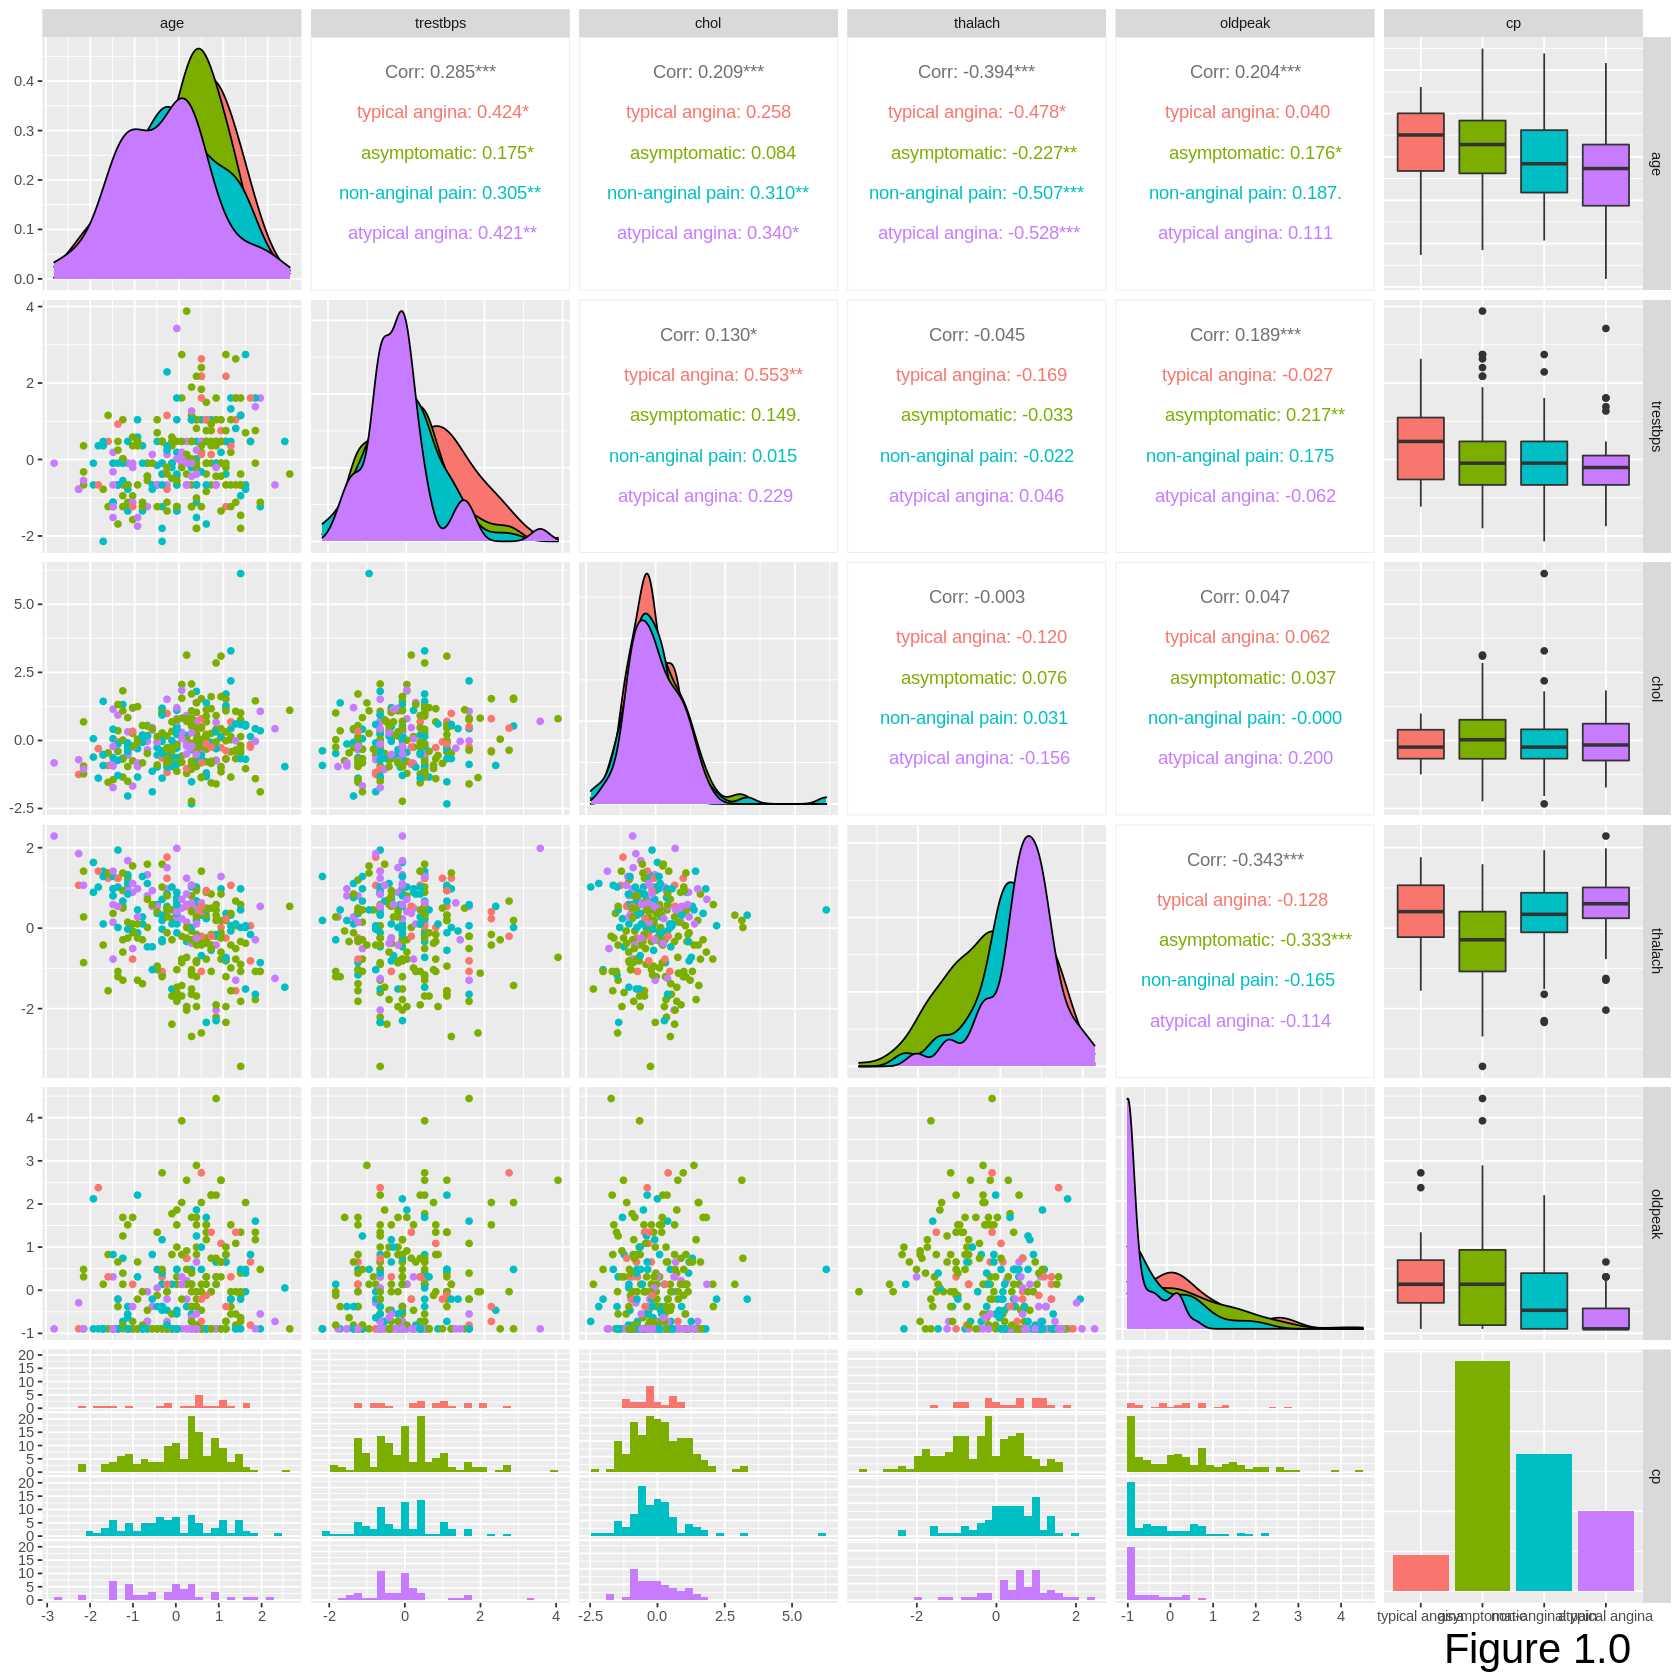

In [15]:
# Creating a ggpair to see which predictor to use. Use this on later steps after we create the average graph.
options(repr.plot.width = 14, repr.plot.height = 14)
cleveland_pairs <- ggpairs(cleveland_scale, mapping = ggplot2::aes(color = cp)) + labs(caption = c(" Figure 1.0 ")) + theme(plot.caption = element_text(size=25))

cleveland_pairs

Looking at Figure 1.0, it can be observed that the graphs of predictors age, resting blood sugar, maximum heart rate, and exercise induced depression all have distinct shapes (distinguished by color) representing different types of chest pain. These distinctions represent that varying values of these factors will in fact lead to different types of chest pain. The graph of the cholesterol, "chol" predictor, however, has similar shapes for all types of chest pain, showing little-to-no correlation between cholesterol levels and the type of chest pain felt by the patients. The shapes of the "cp" column of the visual also show that each bar is roughly equal in size, displaying a lack of variation within the predictor. This further reinforces the numbers observed in the graph above. High levels of cholesterol is a paramount factor in inducing heart disease, and studies have shown that cholesterol levels have been found to correlate with all chest pain types (Andrews, Raby, Barry, et all, 1997). This, along with the numbers and visuals allow us to justify the removal of the cholesterol from our predictors.

In [16]:
# Removing chol as predictor as types of cp doesn't differ for chol
cleveland_train_select <- cleveland_train |>
                            select(!chol)

cleveland_recipe <- recipe(cp~., data = cleveland_train_select) |>
                    step_scale(all_predictors()) |>
                    step_center(all_predictors())

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
            set_engine("kknn") |>
            set_mode("classification")

cleveland_recipe

Recipe

Inputs:

      role #variables
   outcome          1
 predictor          4

Operations:

Scaling for all_predictors()
Centering for all_predictors()

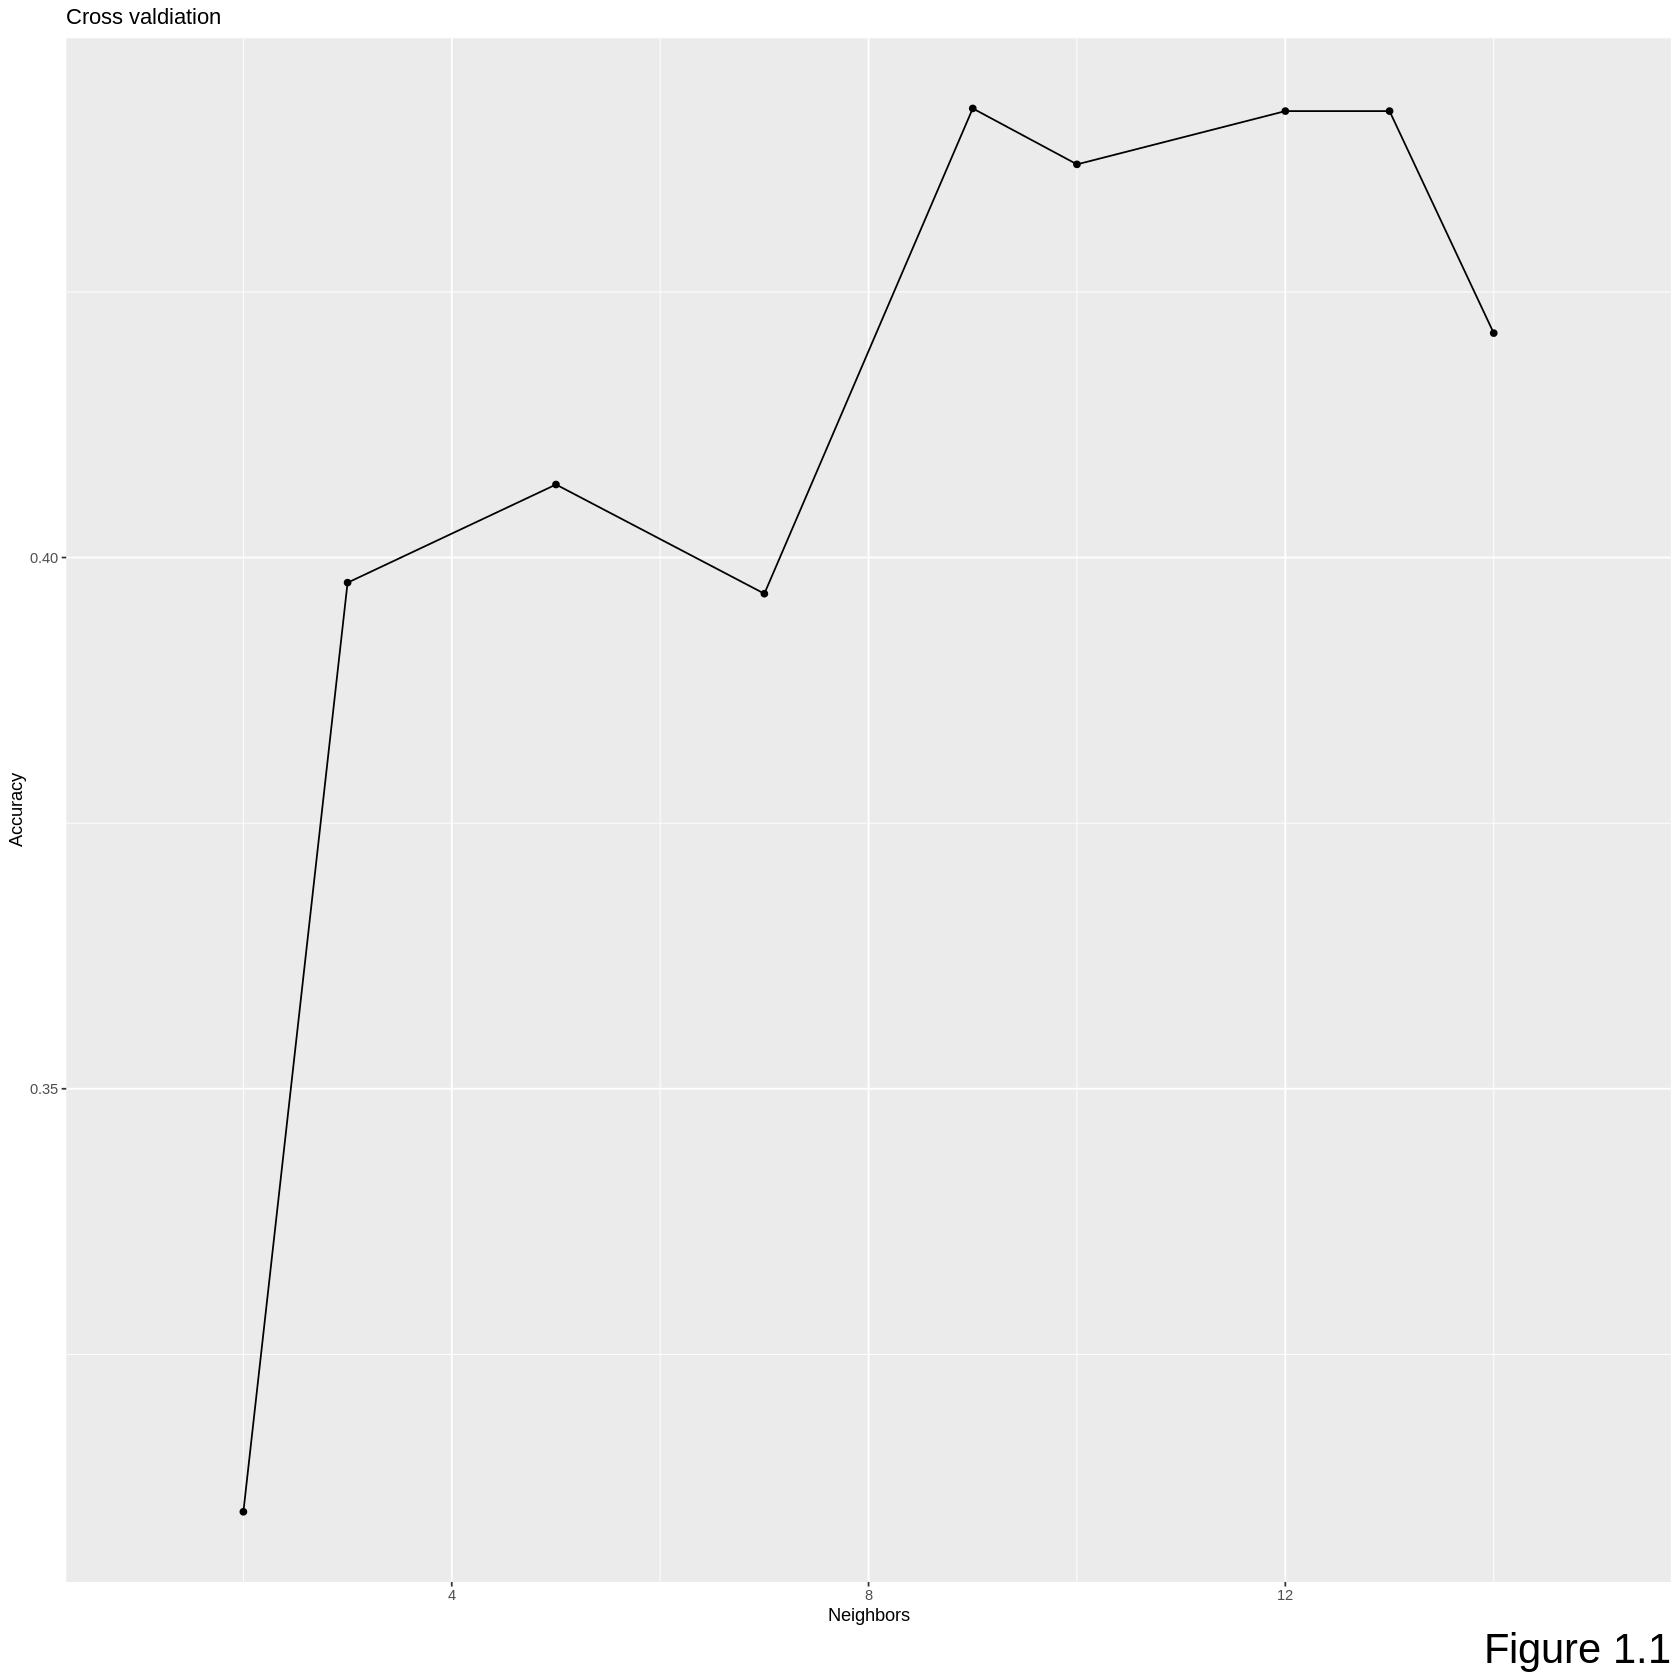

In [ ]:
set.seed(123)
# Perform a 5-fold cross validation on the training set. 
cleveland_vfold <- vfold_cv(cleveland_train_select, v = 5, strata = cp)

# Create a workflow analysis with your recipe and model specifications. 
# Specify that the tuning should try 10 values of k. 
mnist_fit <- workflow() |>
    add_recipe(cleveland_recipe) |>
    add_model(knn_spec) |>
    tune_grid(resamples = cleveland_vfold, grid = 10) |>
    collect_metrics() 

# Filter cross-validation results for accuracy
mnist_accuracy <- mnist_fit |>
    filter(.metric == "accuracy")

# Plot the accuracies determined by the cross-validation
cross_validation_plot <- mnist_accuracy |>
    ggplot(aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() + 
    labs(x = "Neighbors", y = "Accuracy", title = "Cross valdiation ", caption = c("Figure 1.1")) + theme(plot.caption = element_text(size=25)) + xlim(c(1,15))

cross_validation_plot

From Figure 1.1, we can see that the highest accuracy is between K=9 and K=13 with K=10 having a slight decrease in accuracy. To be consistent, we will take K=11 as the best K value for our analysis as K < 9 and k > 13 shows decrease in accuracy.

In [ ]:
cleveland_spec <- nearest_neighbor(weight_func = 'rectangular', neighbors = 11) |>
    set_engine('kknn') |>
    set_mode('classification')

cleveland_fit <- workflow() |>
    add_recipe(cleveland_recipe) |>
    add_model(cleveland_spec) |>
    fit(data = cleveland_train_select)

cleveland_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(11,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.5408163
Best kernel: rectangular
Best k: 11

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



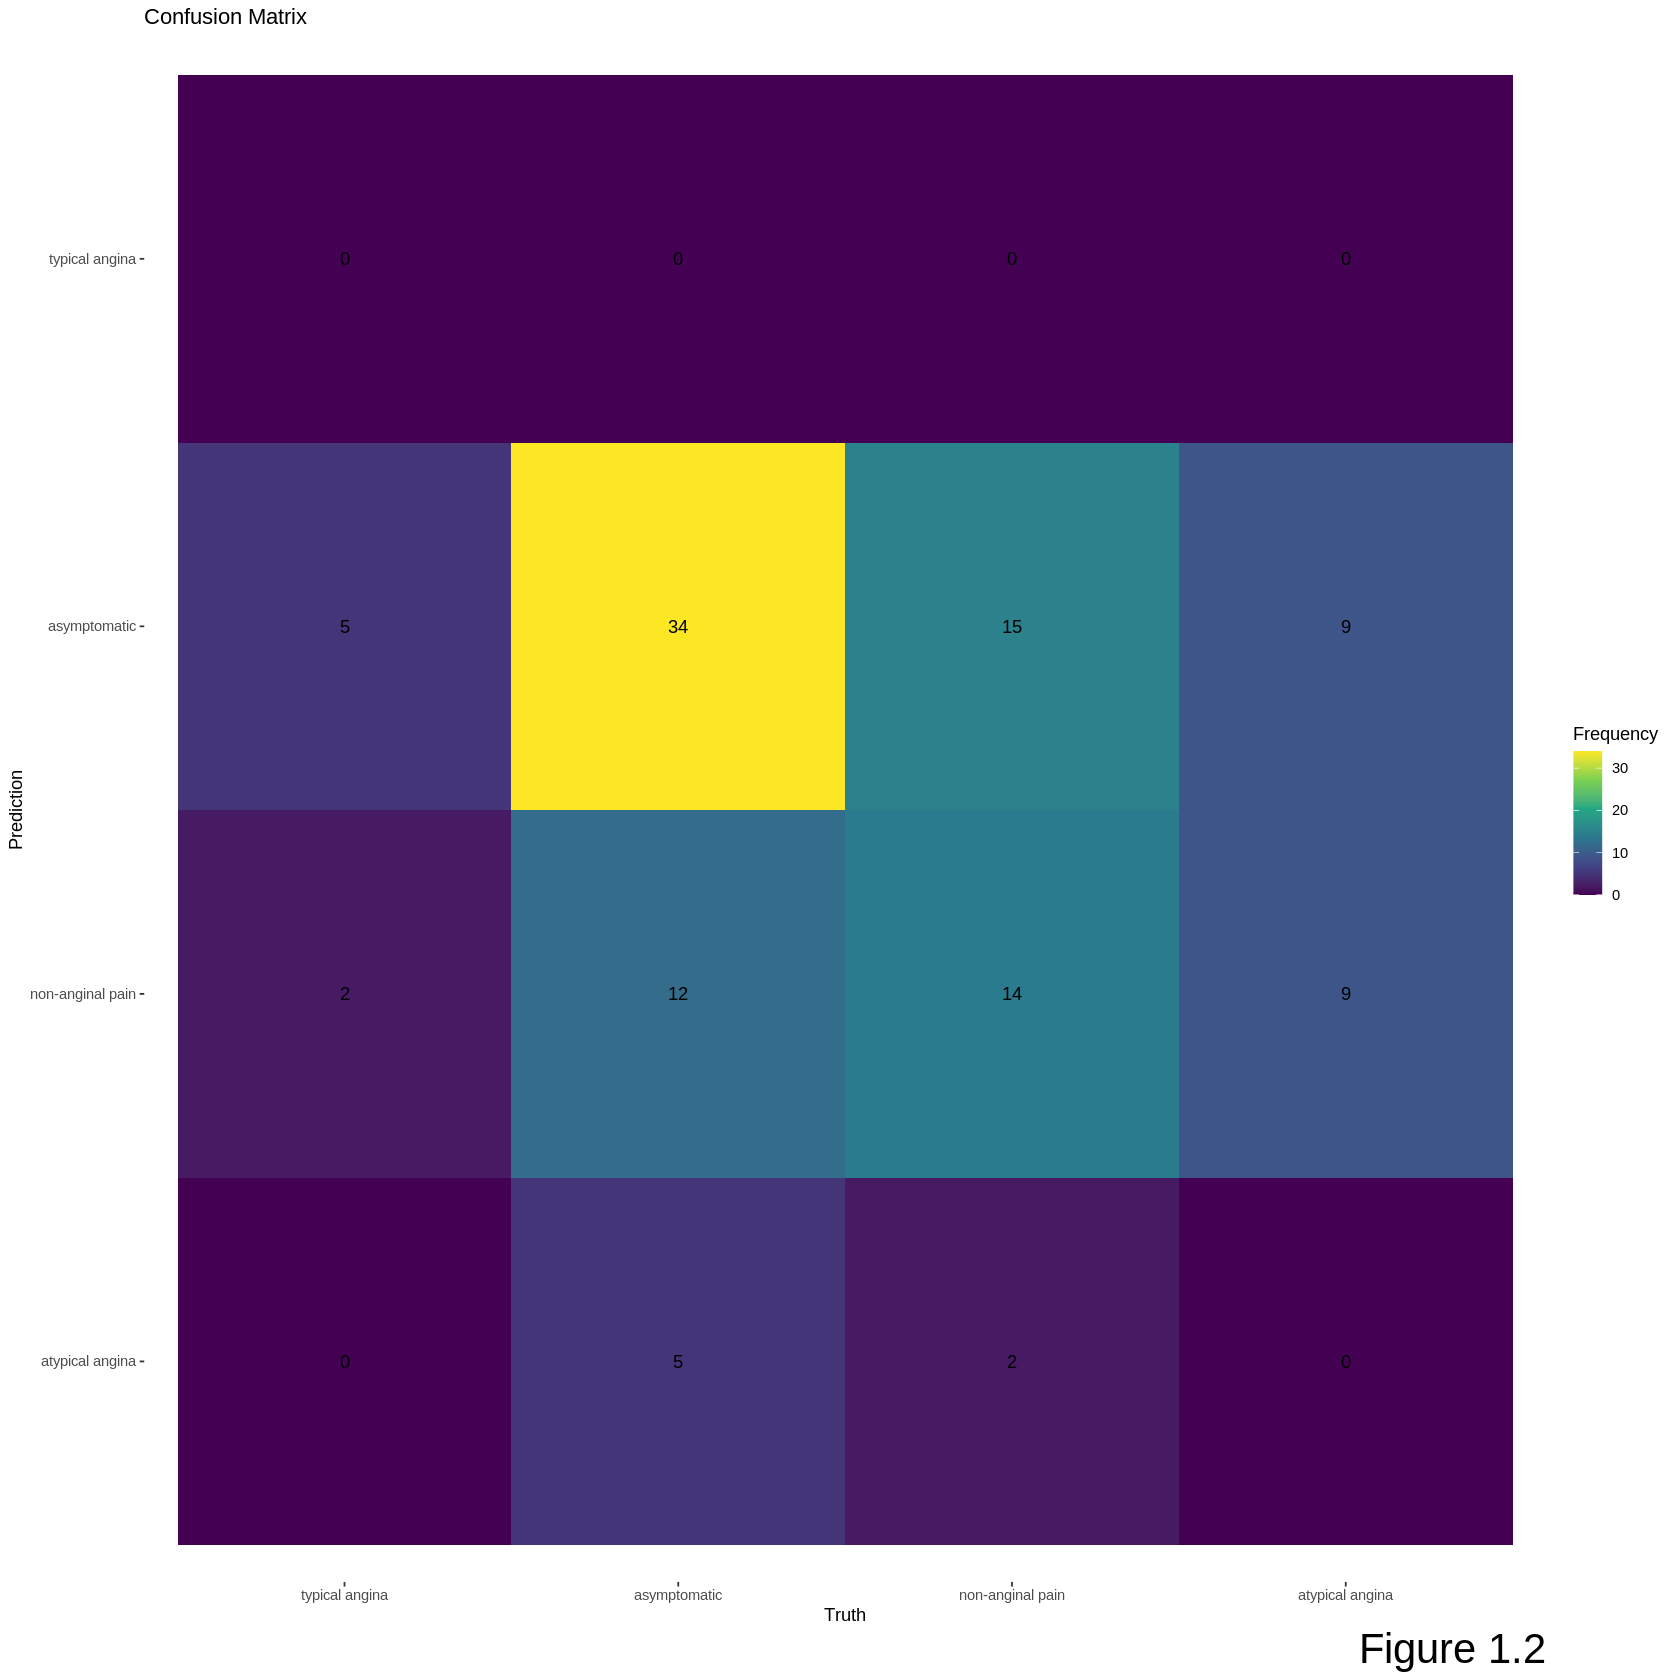

In [18]:
set.seed(123)
# Use the model to predict on the test dataset 
cleveland_test_predictions <- predict(cleveland_fit, cleveland_test) |>
    bind_cols(cleveland_test)

# Get metrics for prediction accuracy
cleveland_test_predictions_metrics <- cleveland_test_predictions |>
    metrics(truth = cp, estimate = .pred_class) |>
    filter(.metric == "accuracy")

# Visualization of Confusion Matrix

# Determine the confusion matrix for the prediction 
cleveland_test_conf_matrix <- cleveland_test_predictions |>
    conf_mat(truth = cp, estimate = .pred_class)

autoplot(cleveland_test_conf_matrix, type= "heatmap") +
    scale_fill_viridis_c(name = "Frequency") +
    labs(title = "Confusion Matrix", caption= c("Figure 1.2")) + theme(plot.caption = element_text(size=25), legend.position = "right")

A confusion matrix can be produced to assess the count of correct and incorrect predictions made by the model. 

Typical and atypical angina were never correctly predicted by the model. In fact, the model did not classify any entries in the testing set as typical angina. A total of 63 testing set entries were classified as asymptomatic despite there only being 51 asymptomatic chest pain types in the testing set. Only 34 asymptomatic chest pain entries were correctly classified, giving an accuracy of 66% for predictions of asymptomatic chest pain. There were 31 counts of non-anginal pain in the testing set, yet only 14 entries were correctly classified as such. Therefore, the model had 45% accuracy in predicvting non-anginal pain.

Of the 107 entries in the testing set, roughly 59% of the entries were classified as asymptomatic chest pain though only 48% of the testing set is actually asymptomatic chest pain. 

In [19]:
cleveland_test_predictions_metrics

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.4485981


**<div>Table 1.10: Predictor Accuracy </div>**

As an easy baseline to compare the accuracy of our model, we can compare the accuracy to the majority classifier. In Table 1.8, asymptomatic chest pains represented 48.09% of the all chest pains in the dataset. Since asymptomatic chest pains represent the majority of the training data, the majority classifier would always predict that a new observation is asymptomatic chest pain. The majority classifier would therefore have an accuracy of 48.09%. 

With `k = 11`, the accuracy of our model is lower than the majority classifier. This means that the K-NN Classification does not improve on the majority classifier.

### Discussion ###

We expected that those with more of these factors will experience more severe, anginal chest pain, but also realize that there are exceptions and other elements that can impact both location and type of chest pain. Since coronary heart disease is impacted by the weakening of blood vessels, the risk for heart disease also goes up with age (Hermann, 2014) as our bodies start to wear down and our hearts become weaker. Those with a higher blood sugar are also more prone to chest pain and heart attacks, as the sugar can damage the veins over time. With Hermann's reasoning, we expect that patients with higher resting blood pressure and are older typically experience typical or atypical angina while on the contrary, we also expect younger patients with normal blood pressure to experience asymptomatic/non-anginal pain.

As a result of the analysis, our findings loosely align with our expectations where our validity is summarized around **44.85%** accuracy when predicting with the testing set whilst our testing set with the best K-value to be estimated around **48.09%**. From Figure 1.2, asymtomatic chest pain is shown with the accuracy of `34/107` which is the chest pain with the most predictions correct. However, it is to be expected as there is an overwhleming amount of asymptomatic cases within the original dataframe. Given the low count of typical angina and atypical angina instances in our training set, it is unsurprising that our model was unable to accurately classify any of these chest pains in the testing set. A larger dataset with greater counts of each chest pain type would significantly improve the accuracy of our model as the training set would also be larger (given we maintain a prop of 0.65). With asymptomatic chest pain instances representing the largest proportion of chest pain in the dataset, our model was biased to classify chest pain as asymptomatic. This was observed in the classification, whereby 59% of the testing set entries were classified as aymptomatic, despite only 48% of the testing set actually being asymptomatic. With a low accuracy from the classifier, there is a limitation of K-NN Classification as it is only able to predict using quantative variables. From other medical resources, there are other possible qualitative factors that may help accurately assess the validity of chest pain type. A use of a different machine learning algorithm (beyond the scope of the course) that can accept both qualitative and quantitative variables may potentially increase the predictivity and therefore could potentially help doctors anticipate forecoming heart diseases for patients. 

Previously when we hypothesized the expected outcome, we also hypothesized how the report can affect the field of research on heart diseases. Being able to predict the location and type of chest pain for patients, doctors can prepare accordingly such as prescribing preventative supplements and making patients aware of potential risk factors. However, since certain chest pains are signs of heart diseases, by predicting what type of chest pain someone will have, we can use that to narrow down which heart disease a patient could be diagnoised with. Those with certain types of chest pains in certain areas can take preventative measures to prevent and mediate the possibility of heart disease, building healthy habits in terms of excersize and diet. Most importantly, these findings can allow doctors to anticipate heart attacks in patients depending on the location of their chest pain, especially those that have no symptoms. Silent heart attacks can be deadly, and knowing the presence of heart disease without chest pain can help both the patient and doctor anticipate them.

Given the findings presented in this report, typical angina and atypical angina is a rare type of chest pain that many coronary heart disease related symptoms cannot predict. As stated previously, there are potentially many qualitative factors that could affect the prediction. Therefore, we hope to leave impact on assisting others for developing accurate prediction for chest pain types by showing that chest pains are difficult to predict so we need more variables to predict them such as frequent usage of tabacco or alcohol. Moreover, it might also show them that k-nn classification is not the best method of predicting chest pain since according to Centers for Disease Control and Prevention, non qualitative variables such as gender and race play a role for chest pain and we cannot incorporate them into k-nn classification.


Some future questions that our analysis could lead to are:

1. How can the type of chest pain caused by resting blood sugar, maximum heart rate, and levels of cholesterol be used to predict the time, severity, and frequency of a heart attack? Although this may not actually be possible, knowing the location and type of chest pain can certainly allow patients of heart disease to anticipate and prepare for heart attacks, especially as pain diminishes or increases unexpectedly.

2. Given our analysis and resources, were there any irregularities within the cleveland dataset compared to another country/state? was there any other attributes that are not recorded in any of the future dataset to help improve accuracy? 

### References ###

> - At least 2 citations of literature relevant to the project (format is your choice, just be consistent across the references).
> - Make sure to cite the source of your data as well.

1. Heart Disease. UCI Machine Learning Repository: Heart disease data set. (n.d.). Retrieved November 21, 2022, from https://archive.ics.uci.edu/ml/datasets/Heart+Disease 
2. Coronary artery disease: Symptoms, causes &amp; treatment. Cleveland Clinic. (n.d.). Retrieved November 21, 2022, from https://my.clevelandclinic.org/health/diseases/16898-coronary-artery-disease 
3. Academic.oup.com. (n.d.). Retrieved November 30, 2022, from https://academic.oup.com/eurheartjsupp/article/9/suppl_F/F3/393361 
4. Heart disease &amp; age. memorialhermann. (2021, December 27). Retrieved December 3, 2022, from https://memorialhermann.org/services/specialties/heart-and-vascular/healthy-living/education/heart-disease-and-age
5. Centers for Disease Control and Prevention (US); National Center for Chronic Disease Prevention and Health Promotion (US); Office on Smoking and Health (US). How Tobacco Smoke Causes Disease: The Biology and Behavioral Basis for Smoking-Attributable Disease: A Report of the Surgeon General. Atlanta (GA): Centers for Disease Control and Prevention (US); 2010. 6, Cardiovascular Diseases. Available from: https://www.ncbi.nlm.nih.gov/books/NBK53012/
6. Andrews, T. C., Thomas C. Andrews Cardiovascular Division and Vascular Medicine Section, Raby, K., Khether Raby Cardiovascular Division and Vascular Medicine Section, Barry, J., Joan Barry Cardiovascular Division and Vascular Medicine Section, Naimi, C. L., Cameron L. Naimi Cardiovascular Division and Vascular Medicine Section, Allred, E., Elizabeth Allred Cardiovascular Division and Vascular Medicine Section, Ganz, P., Peter Ganz Cardiovascular Division and Vascular Medicine Section, Selwyn, A. P., Andrew P. Selwyn Cardiovascular Division and Vascular Medicine Section, &amp; Selwyn, C. to A. P. (1997, January 21). Effect of cholesterol reduction on myocardial ischemia in patients with coronary disease. Circulation. Retrieved December 3, 2022, from https://www.ahajournals.org/doi/full/10.1161/01.cir.95.2.324 






